In [2]:
import pandas as pd
import numpy as np
from scipy.stats import uniform

import matplotlib as mpl
from matplotlib import pyplot as plt

In [3]:
mpl.rcParams["figure.figsize"] = (15,8)
plt.style.use("bmh")

In [4]:
def round_to(x, rounding_val):
    return np.round(x / rounding_val) * rounding_val

# Uniform(0, $\theta$)

In [60]:
def get_bin_counts(sample):
    bin_counts = pd.DataFrame(sample['bin_j'].value_counts()).sort_index()
    bin_df = (
        pd.DataFrame(
            data={'bin_j': np.nan},
            index=list(range(0, bin_counts.index.max() + 1))
        )
        .fillna(bin_counts)
        .fillna(0)
        .assign(bin_count= lambda df: df.bin_j.astype("int32"))
        [['bin_count']]
    )
    bin_df.index.name = 'bin_j'
    return bin_df

def generate_unif_samples_with_bins(sample_size, theta, bin_size):
    unif = uniform(scale=theta)
    sample = pd.DataFrame(unif.rvs(sample_size), columns=['x'])
    sample['bin_j'] = sample['x'].apply(lambda x: int(np.floor(x/bin_size)))
    return sample

def unif_log_likeli(theta, samples):
    return 1/theta**len(samples) * np.float(samples['x'].max() < theta)

def naive_binned_mle_est(bin_counts, bin_size):
    return (bin_counts.index.max() + min(1,
        bin_counts.query('index == index.max()').bin_count.mean()
        / bin_counts.query('index < index.max()').bin_count.mean()
    )) * bin_size

In [61]:
sample_size = 100
theta = 3.1
bin_size = 1

unif = uniform(scale=theta)
samples = generate_unif_samples_with_bins(sample_size, theta, bin_size)
bin_counts = get_bin_counts(samples)
display(samples.head())
display(bin_counts)
naive_binned_mle_est(bin_counts, bin_size)

,x,bin_j
0,1.026750,1
1,2.305688,2
2,0.103681,0
3,2.492763,2
4,1.849993,1


,bin_count
bin_j,
0,29
1,38
2,29
3,4


3.125

In [103]:
sample_size = 500
theta = 3.1
bin_size = 0.5

naive_binned_mles = []
mles = []

for i in range(1000):
    samples = generate_unif_samples_with_bins(sample_size, theta, bin_size)
    bin_counts = get_bin_counts(samples)
    naive_binned_mles.append(naive_binned_mle_est(bin_counts, bin_size))
    mles.append(samples['x'].max())

In [104]:
bin_errors = theta - np.array(naive_binned_mles)
mle_errors = theta - np.array(mles)

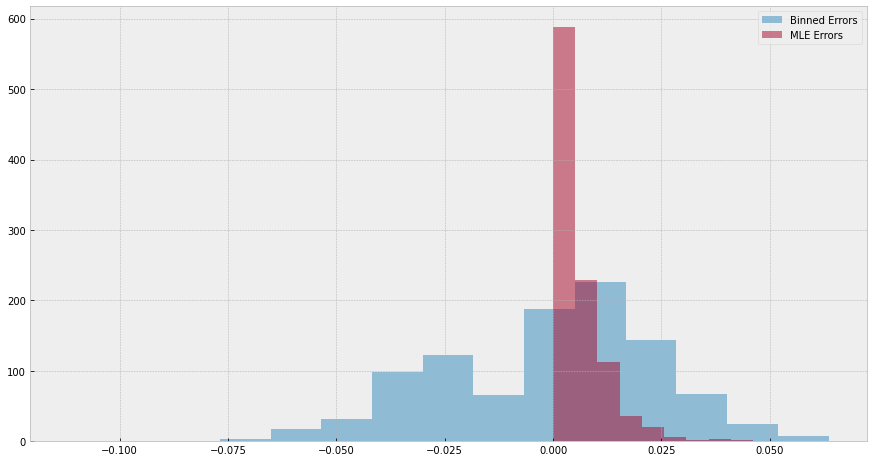

In [108]:
plt.figure()
plt.hist(bin_errors, alpha=0.5, label='Binned Errors', bins=15)
plt.hist(mle_errors, alpha=0.5, label='MLE Errors')
plt.legend()
plt.show()

In [106]:
np.mean(bin_errors)

-0.0007335264584077148

In [107]:
np.mean(mle_errors)

0.0060047659292758754